In [1]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'../src/')

from utils import *
from multiply_connected_pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex

In [2]:
# with open('pipes_and_shifts.pickle','rb') as f:
#     pipes, shifts = pickle.load(f)
with open('pipes_and_shifts_built.pickle','rb') as f:
    pipes_and_shifts = pickle.load(f)
    pipes = [p for p,_ in pipes_and_shifts]
    shifts = [s for _,s in pipes_and_shifts]
 

In [3]:
for pipe in set(pipes):
    pipe.build_plotting_data(density=5)

/home/haiy/pkg/fmm2d/python/fmm2dpy/fmm2d.py:894: ComplexWarning: Casting complex values to real discards the imaginary part
  out.pottarg,out.gradtarg,out.ier = lfmm.cfmm2d_t_d_g(eps,sources,dipstr,targets)


KeyboardInterrupt: 

In [ ]:
bdr_pipe = BoundaryPipe([BoundaryLet(-200,0,0,4,-1),BoundaryLet(248,0,np.pi,4,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
lets = sorted([l for p in real_pipes for l in p.lets], key=lambda l: l.x)

(Let(x=-200.0, y=0.0, dir=-3.141592653589793, dia=4.0),
 Let(x=248.0, y=0.0, dir=1.1397287178988956e-16, dia=4.0))

In [ ]:
ps = PipeSystem(real_pipes,bdr_pipe)

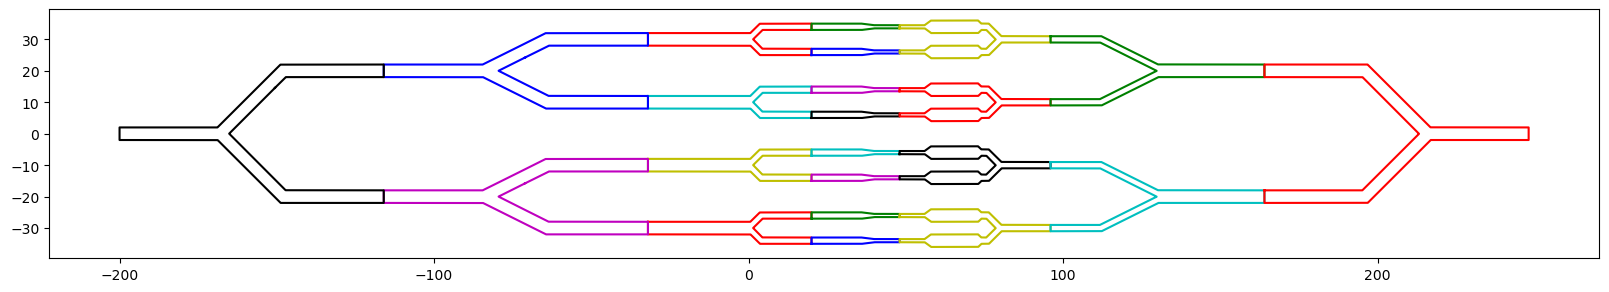

In [ ]:
color = 'rgbycmk'*10

fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

for a,i,j,c in zip(range(22),pipes,shifts,color):
    ax.plot(*(i.exterior_boundary.plyg_bdr() + j).T,c=c)
    # for k,let in enumerate(i.lets):
        # ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
    # ax.text(*j,f'{a}, {j}',color=c)

In [ ]:
xs, ys, u_field, v_field, p_field, o_field = ps.plotting_data()

In [ ]:
from scipy.interpolate import griddata

def streams(ax,xx,yy,u,v,base_map=False):
    x = np.linspace(xx.min(), xx.max(), 5000)
    y = np.linspace(yy.min(), yy.max(), 5000)

    xi, yi = np.meshgrid(x,y)

    #then, interpolate your data onto this grid:

    px = xx.flatten()
    py = yy.flatten()
    pu = u.flatten()
    pv = v.flatten()
    pspeed = speed.flatten()

    gu = griddata(zip(px,py), pu, (xi,yi))
    gv = griddata(zip(px,py), pv, (xi,yi))
    gspeed = griddata(zip(px,py), pspeed, (xi,yi))

    lw = 6*gspeed/np.nanmax(gspeed)
    #now, you can use x, y, gu, gv and gspeed in streamplot:

    if base_map:
        xx,yy = ax(xx,yy)
        xi,yi = ax(xi,yi)

    ax.contour(xx,yy,speed, colors='k', alpha=0.4)
    ax.plot(xx,yy,'-k',alpha=0.3)
    ax.plot(xx.T,yy.T,'-k',alpha=0.3)
    ax.plot(xi,yi,'-b',alpha=0.1)
    ax.plot(xi.T,yi.T,'-b',alpha=0.1)
    c = ax.streamplot(x,y,gu,gv, density=2,
    linewidth=lw, color=gspeed, cmap=plt.cm.jet)

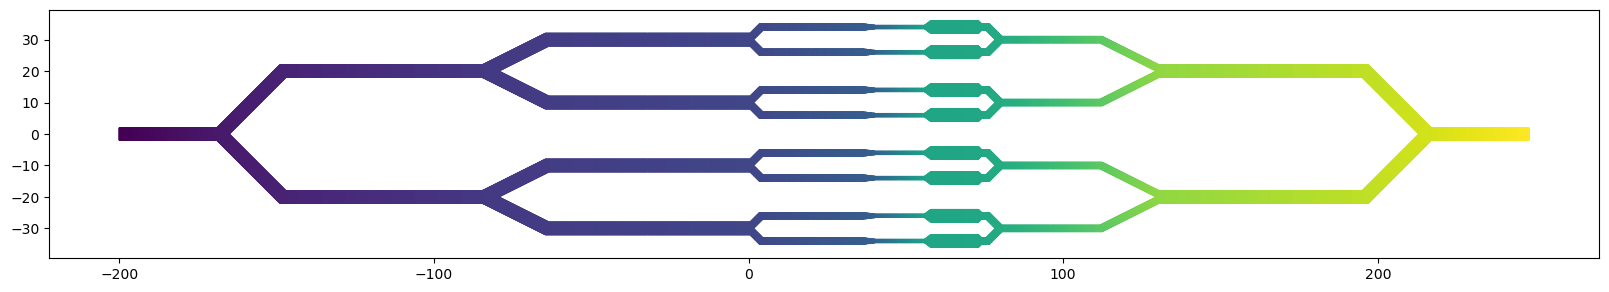

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.set_aspect('equal')
ax.scatter(xs,ys,c=p_field,s=0.1)

In [ ]:
with open('global_pipe_built.pickle','rb') as f:
    global_pipe = pickle.load(f)

In [ ]:
velocity = global_pipe.velocity(xs,ys,global_pipe.omegas[0])

In [ ]:
pressure, vorticity = global_pipe.pressure_and_vorticity(xs,ys,global_pipe.omegas[0])

In [ ]:
velocity_connected = np.array((u_field, v_field)).T

In [ ]:
np.linalg.norm(velocity - velocity_connected,axis=1) / np.linalg.norm(velocity,axis=1)

array([0.04420098, 0.00410574, 0.0030664 , ..., 0.0001631 , 0.00040412,
       0.00060445])

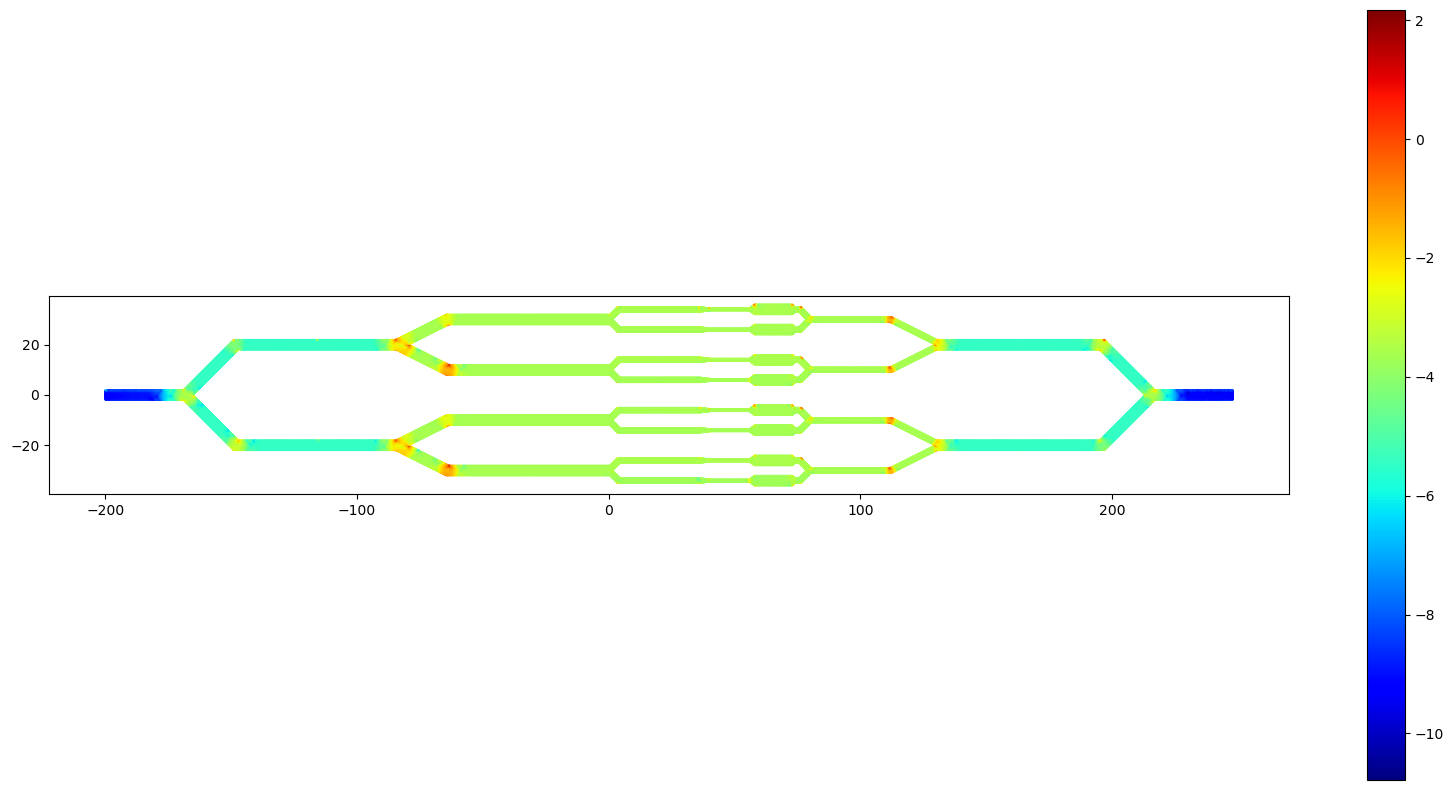

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')
im = ax.scatter(xs,ys,c=np.log10(relative_error),s=0.1,cmap='jet')
fig.colorbar(im)